In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv("/content/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.shape

(569, 33)

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
num_data=data.iloc[:,1:]
num_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
data.groupby("diagnosis").agg(["sum","mean","max","min"])

radius_mean                           texture_mean             \
                  sum       mean    max     min          sum       mean   
diagnosis                                                                 
B            4336.309  12.146524  17.85   6.981      6395.57  17.914762   
M            3702.120  17.462830  28.11  10.950      4580.24  21.604906   

                        perimeter_mean              ... concave points_worst  \
             max    min            sum        mean  ...                  max   
diagnosis                                           ...                        
B          33.81   9.71       27872.92   78.075406  ...                0.175   
M          39.28  10.38       24457.46  115.365377  ...                0.291   

                   symmetry_worst                            \
               min            sum      mean     max     min   
diagnosis                                                     
B          0.00000        96.4778  0.270246  0.4228  0.1566   
M          0.02899        68.5752  0.323468  0.6638  0.1565   

          fractal_dimension_worst                             
                              sum      mean     max      min  
diagnosis                                                     
B                        28.36082  0.079442  0.1486  0.05521  
M                        19.40435  0.091530  0.2075  0.05504  

[2 rows x 120 columns]

In [19]:
# @title plot pairplots
import seaborn as sns

In [ ]:

sns.pairplot(data,hue="diagnosis")
plt.show()

In [2]:
# @title Co-relation


In [15]:
num_data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


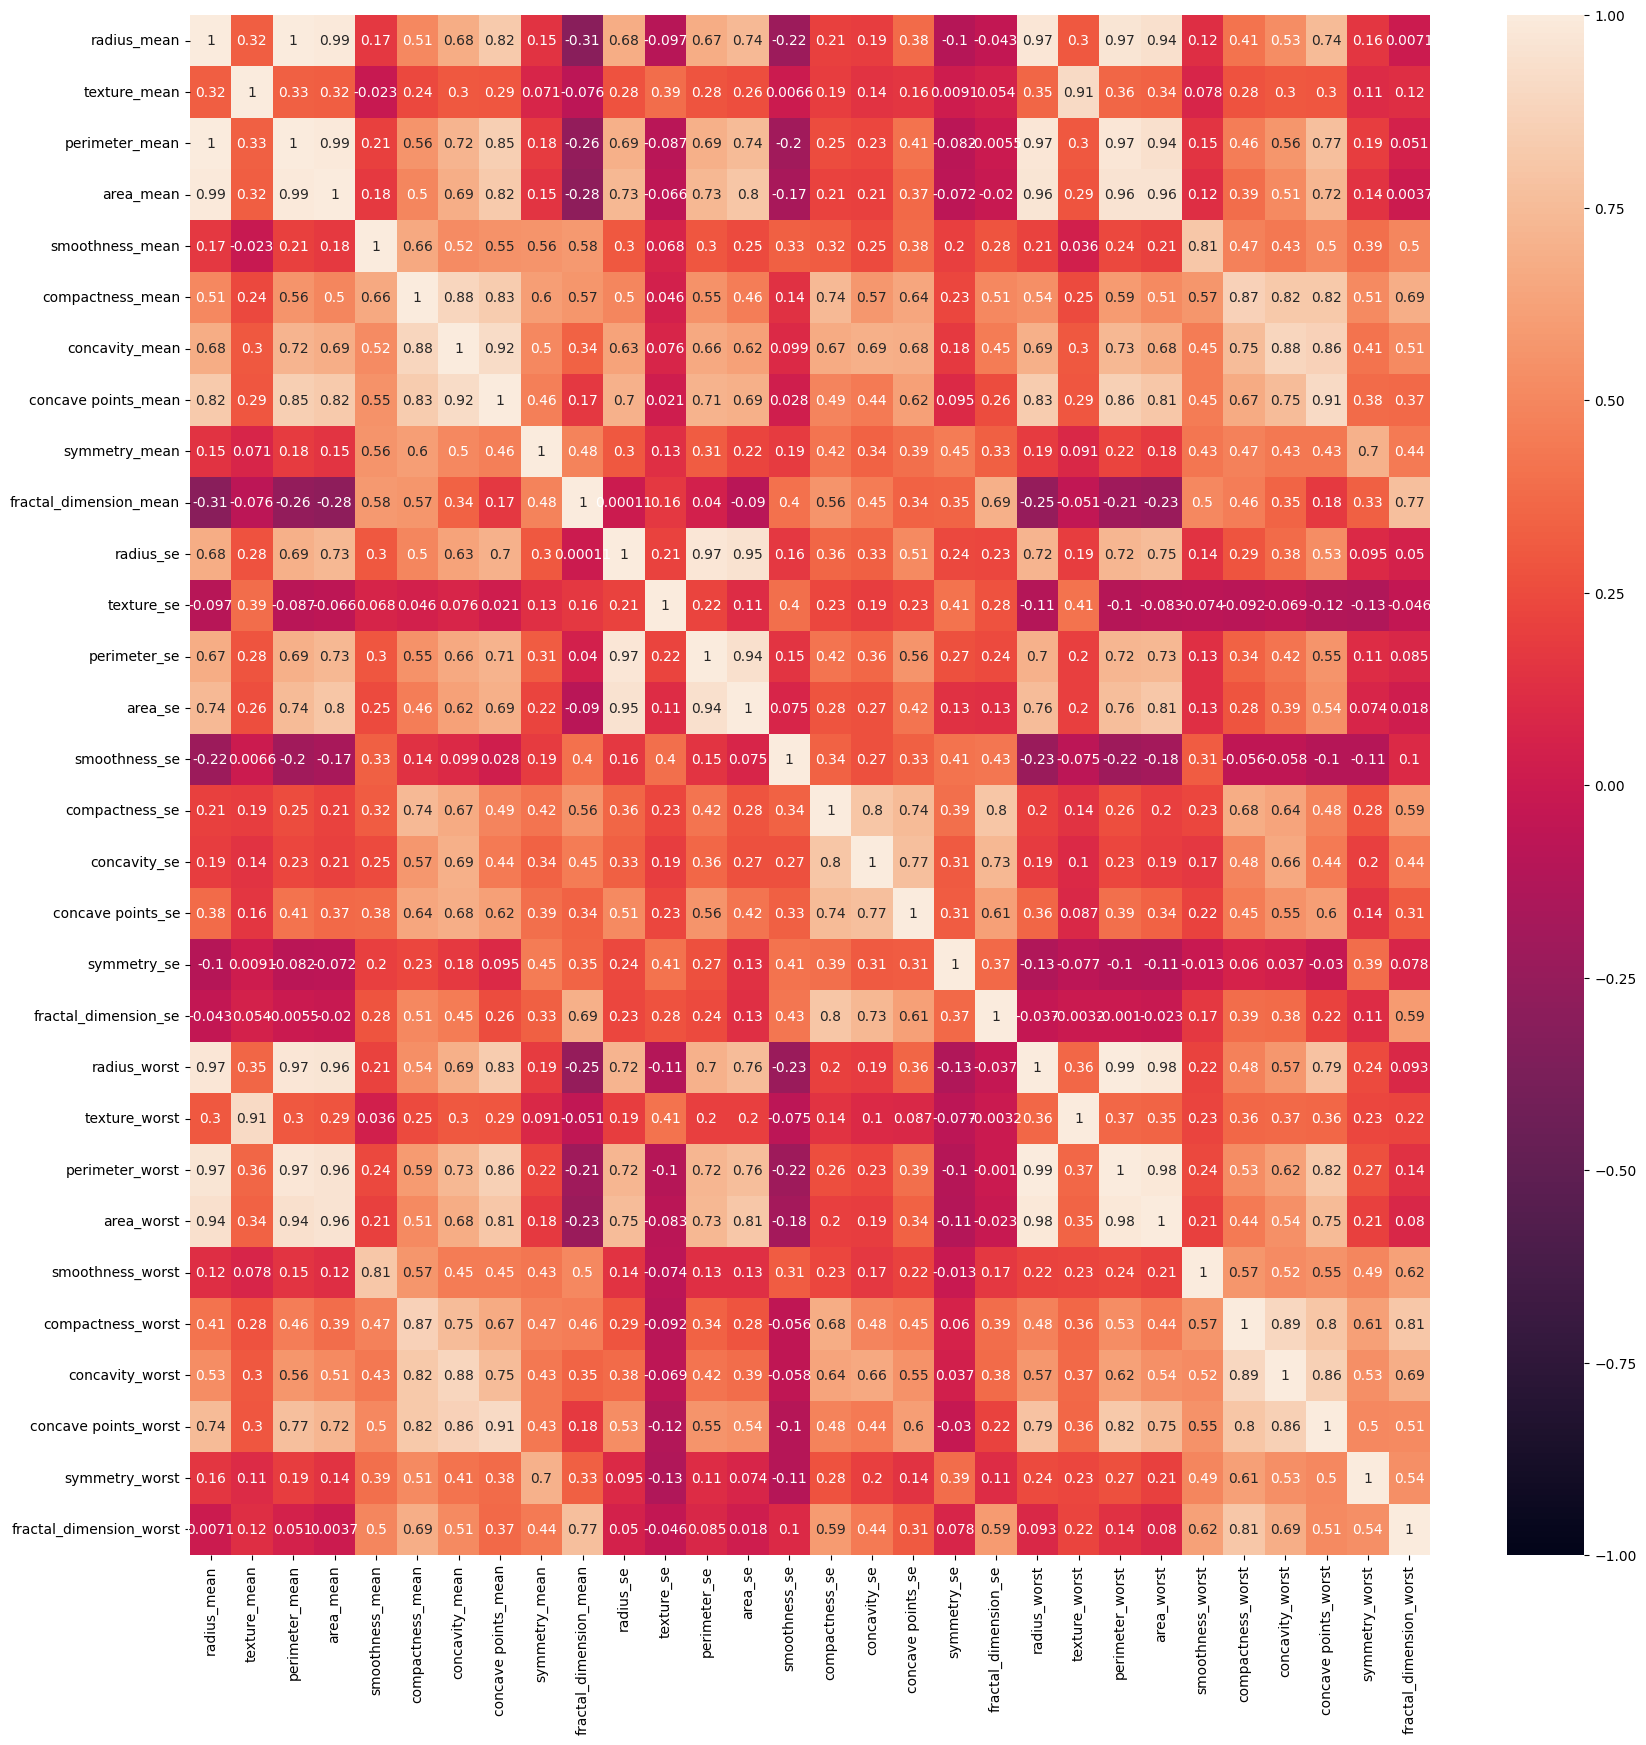

In [20]:
#check corelation
plt.figure(figsize=(20,20))
sns.heatmap(num_data.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [21]:
# prompt: remove radius_mean,area_mean ,perimeter_mean,radius_worst,perimeter_worst,area_worst columns in num_data and assign to num_data1

num_data1=num_data.drop(['area_mean','perimeter_mean','radius_worst','perimeter_worst','area_worst'],axis=1)
num_data1

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


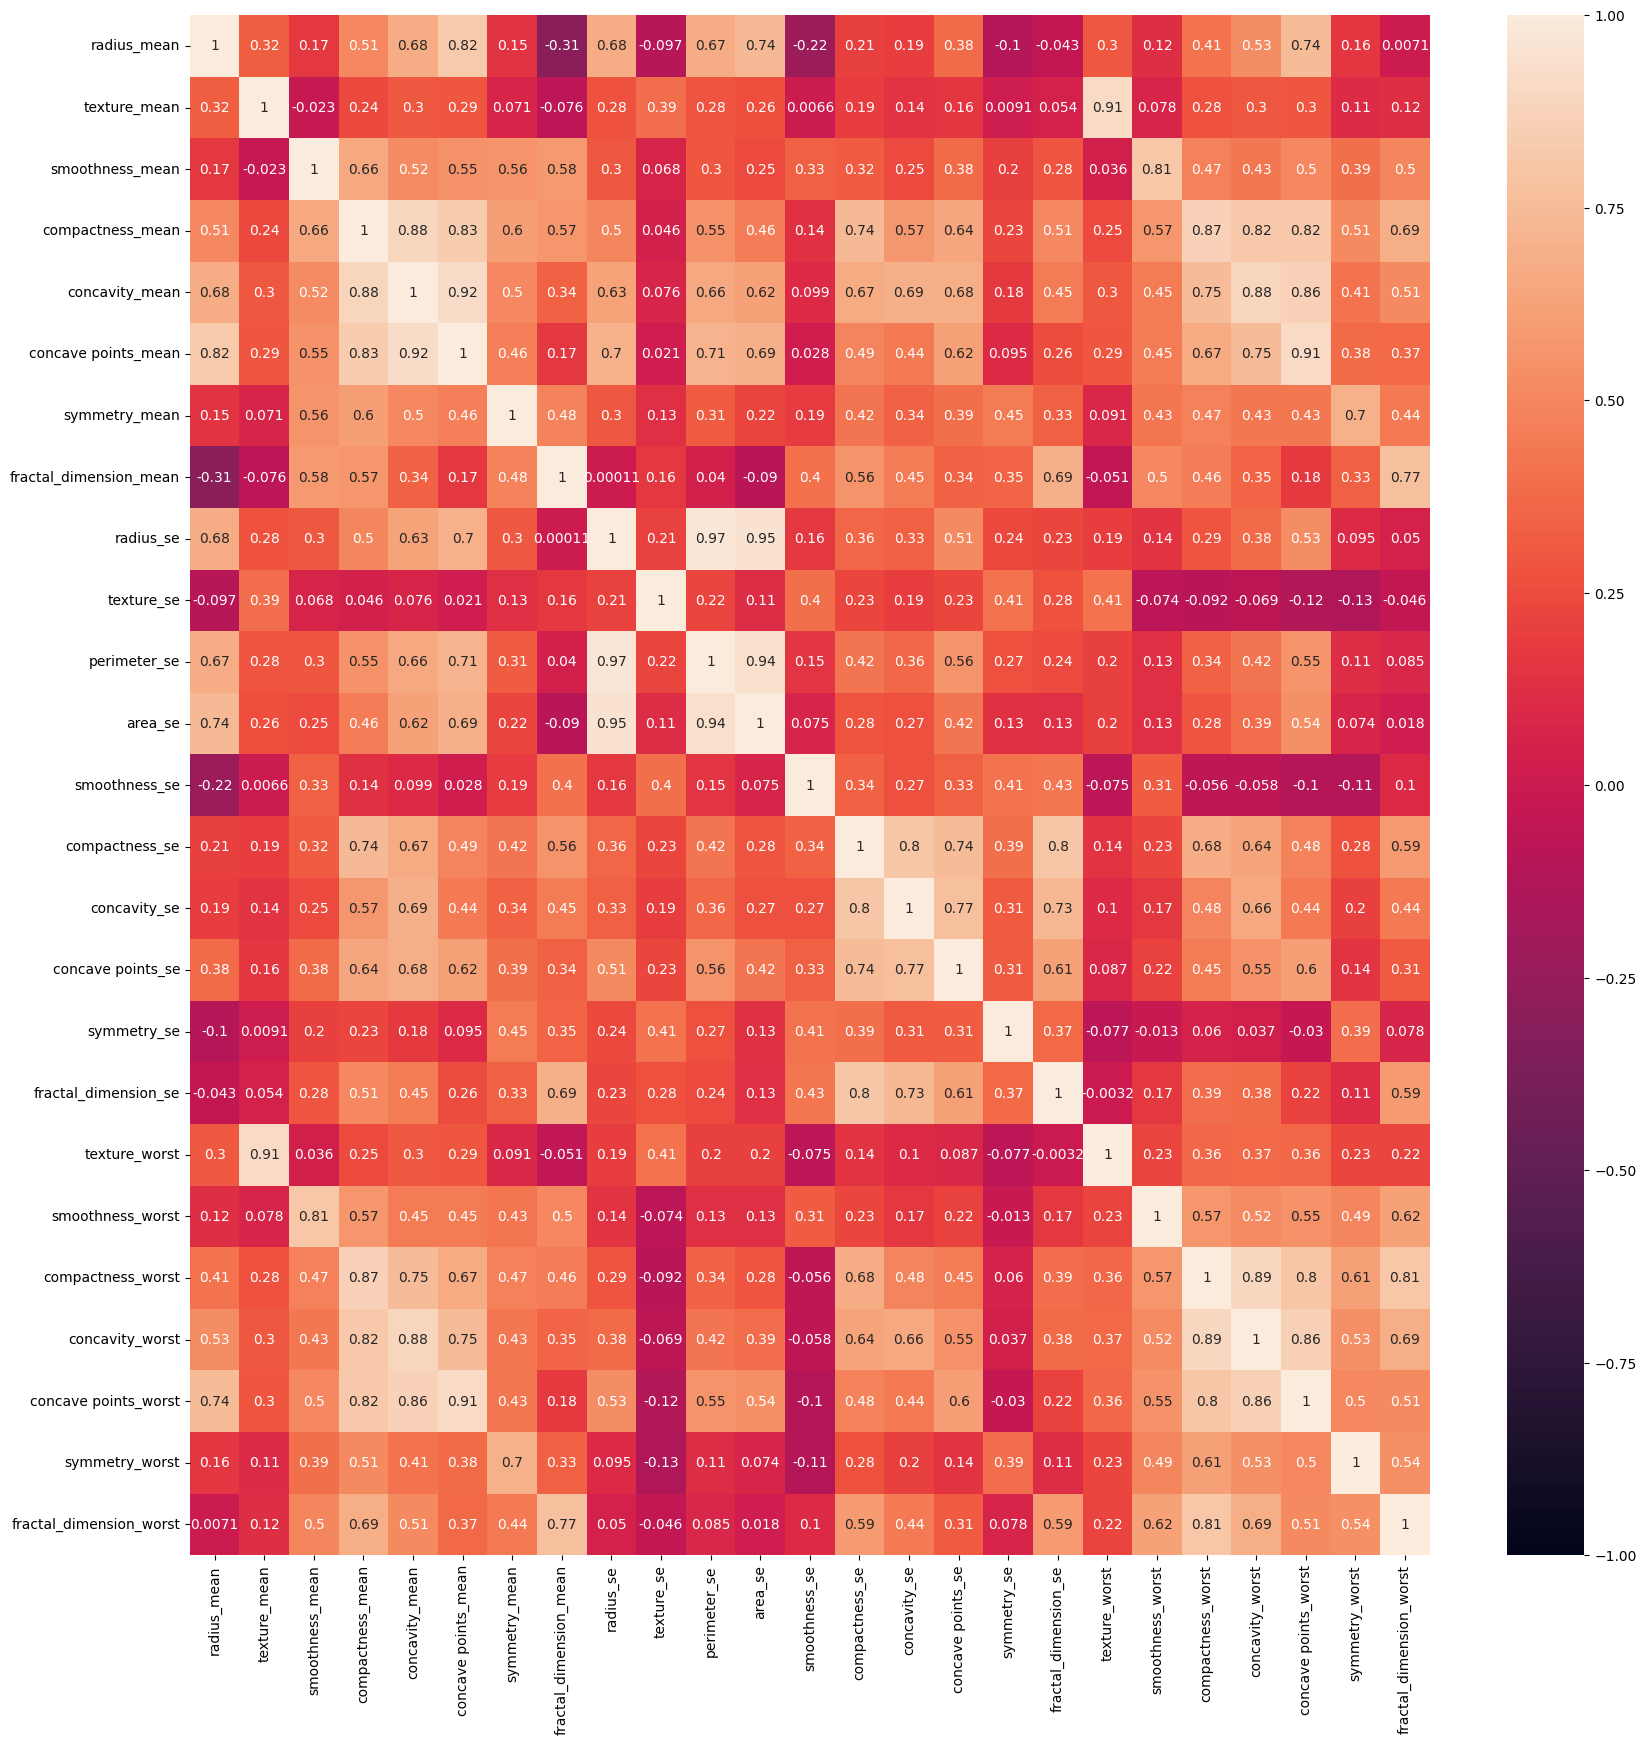

In [22]:
#check corelation
plt.figure(figsize=(20,20))
sns.heatmap(num_data1.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [23]:
# prompt: remove area_se,radius_se columns in num_data1 and assign to num_data2

num_data2=num_data1.drop(['area_se','radius_se'],axis=1)
num_data2


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,8.589,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,3.445,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,5.438,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,7.673,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,5.203,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,3.425,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,5.772,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


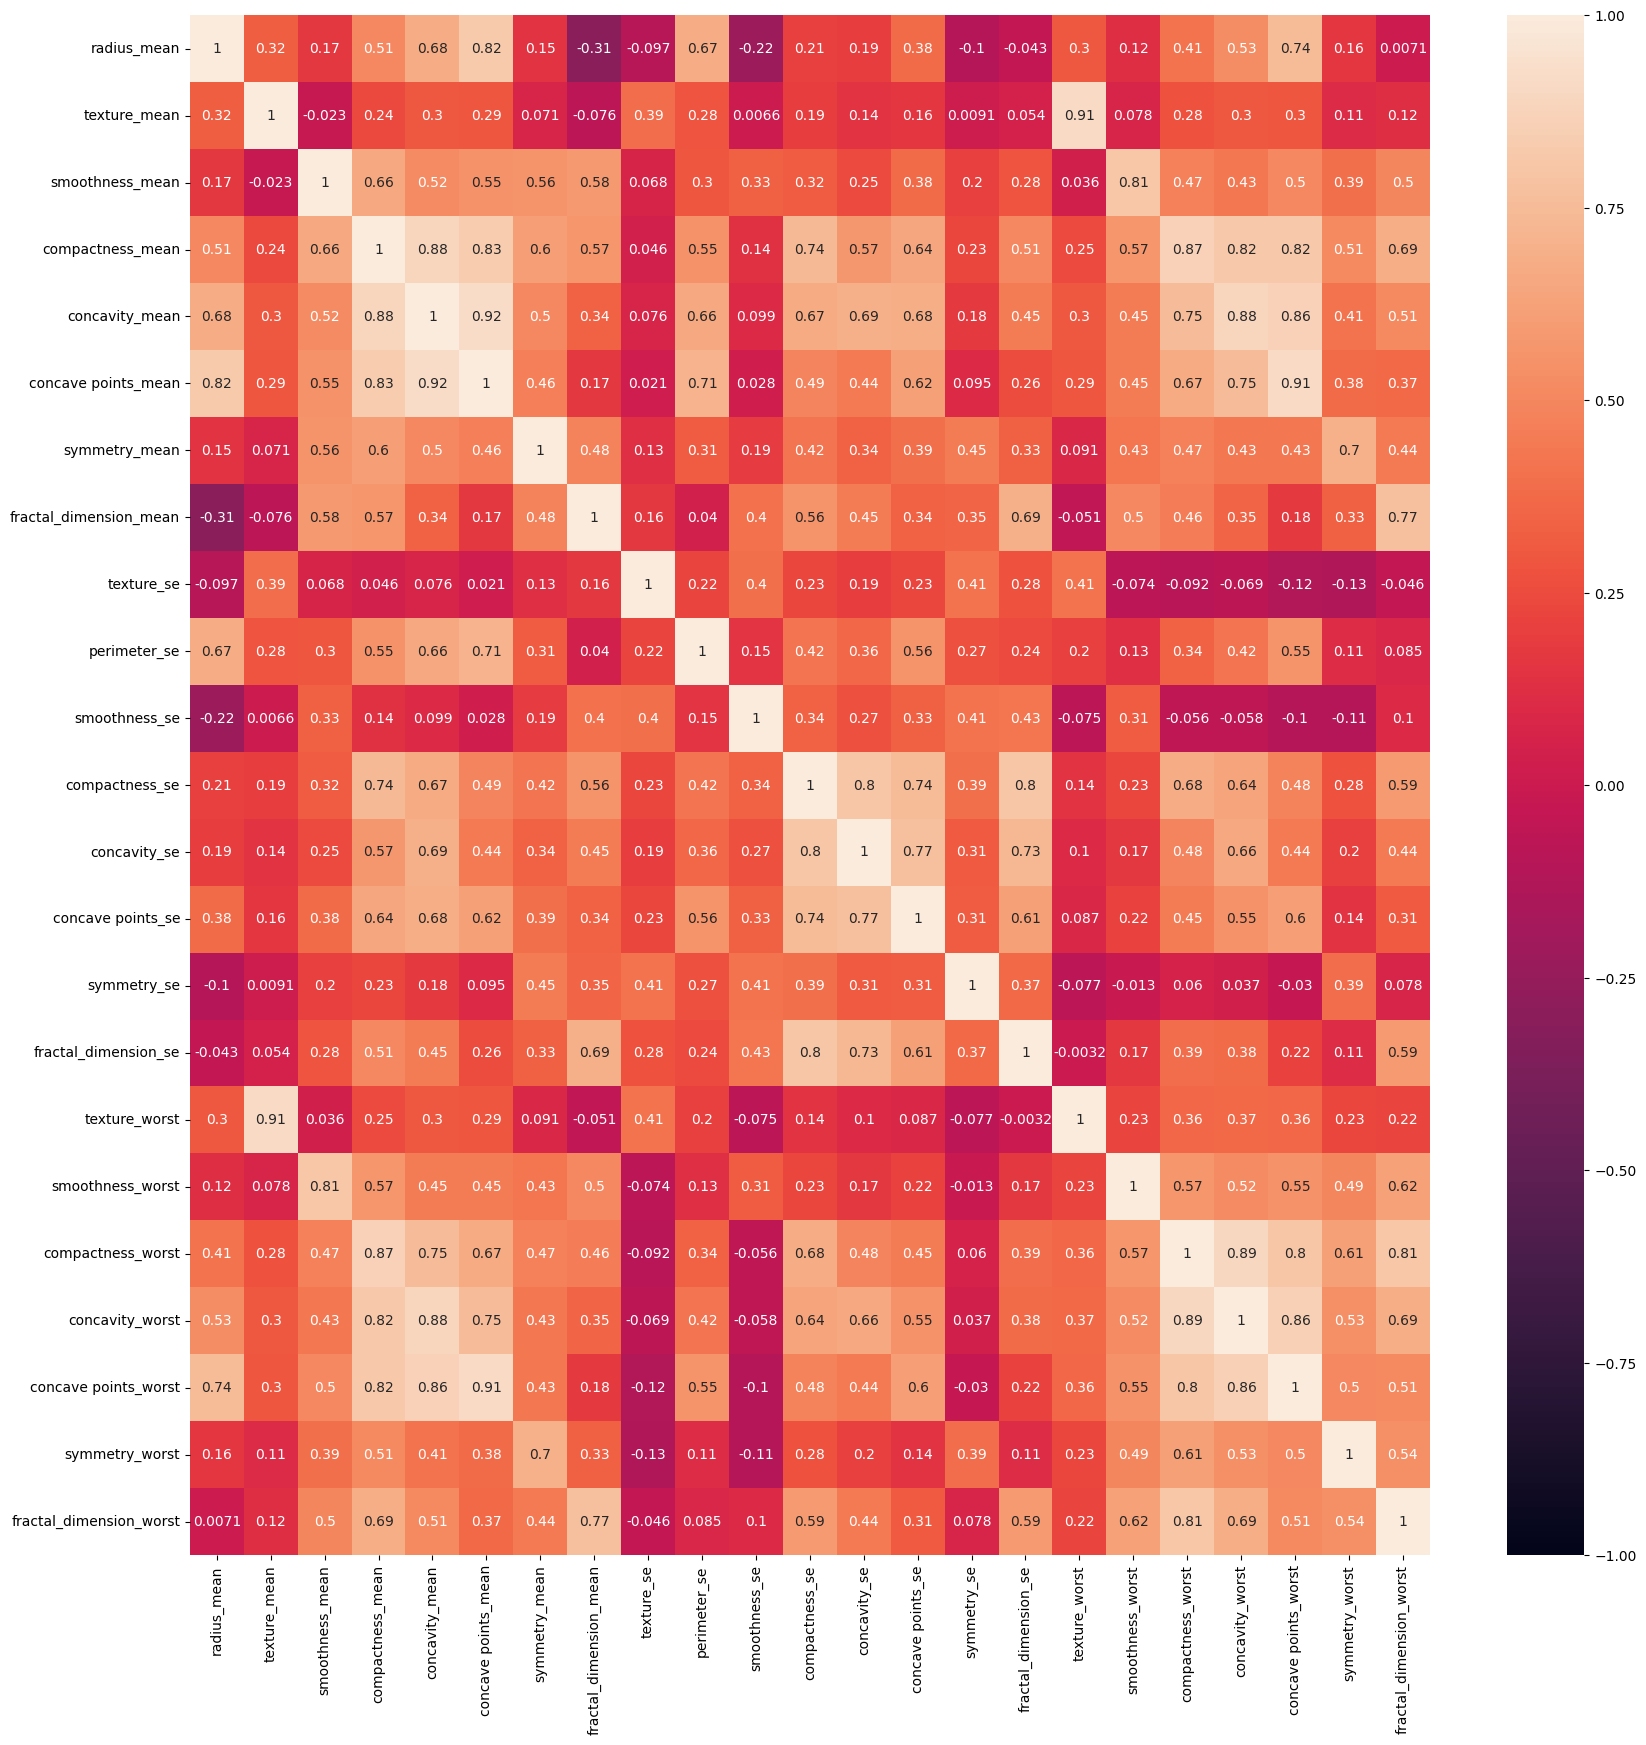

In [24]:
#check corelation
plt.figure(figsize=(20,20))
sns.heatmap(num_data2.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

# Train a model

In [25]:
# @title standarizing


In [26]:
x=num_data.values
y=data.iloc[:,0].values
x_2=num_data2.values #feature reduced x

In [27]:
print(x.shape)
print(x_2.shape)

(569, 30)
(569, 23)


In [28]:
#for feature reduced x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_2=sc.fit_transform(x_2)
x_2

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [29]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
# prompt: split train test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [32]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [33]:
#check all models
def fit_ml0(idx):
  models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(n_estimators=500),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]
  model1=models[idx]
  model1.fit(x_train,y_train)
  y_pred=model1.predict(x_test)
  return accuracy_score(y_test,y_pred)

In [46]:
for j in range(5):
  print(fit_ml0(j))

0.9649122807017544
0.9473684210526315
0.956140350877193
0.9649122807017544
0.956140350877193


In [35]:
#for feature reducing x
x2_train, x2_test, y_train, y_test = train_test_split(x_2, y, test_size=0.2, random_state=0)

In [44]:
#check all models
def fit_ml1(idx):
  models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(n_estimators=500),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]
  model1=models[idx]
  model1.fit(x2_train,y_train)
  y_pred=model1.predict(x2_test)
  return accuracy_score(y_test,y_pred)

In [45]:
for j in range(5):
  print(fit_ml1(j))

0.9649122807017544
0.956140350877193
0.9649122807017544
0.9736842105263158
0.9122807017543859


In [43]:

for j in range(5):
  print("the accuracy without feature reducing: ",fit_ml0(j))
  print("the accuracy with feature reducing:    ",fit_ml1(j))
  print("-------------------------------------------------")




the accuracy without feature reducing:  0.9649122807017544
the accuracy with feature reducing:     0.9649122807017544
-------------------------------------------------
the accuracy without feature reducing:  0.9473684210526315
the accuracy with feature reducing:     0.956140350877193
-------------------------------------------------
the accuracy without feature reducing:  0.956140350877193
the accuracy with feature reducing:     0.956140350877193
-------------------------------------------------
the accuracy without feature reducing:  0.9649122807017544
the accuracy with feature reducing:     0.9736842105263158
-------------------------------------------------
the accuracy without feature reducing:  0.956140350877193
the accuracy with feature reducing:     0.9122807017543859
-------------------------------------------------


Final model

In [58]:
model=LinearDiscriminantAnalysis()
model.fit(x2_train,y_train)
y_pred=model.predict(x2_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [51]:
# Hyper parameter optimization

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]}
cval= KFold(n_splits=5)
grid_search = GridSearchCV(model, parameters, cv=cval)
grid_search.fit(x2_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'solver': 'svd', 'tol': 0.0001}
0.9428571428571428


In [59]:
model=LinearDiscriminantAnalysis(solver='svd',tol=0.0001)
model.fit(x2_train,y_train)
y_pred=model.predict(x2_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

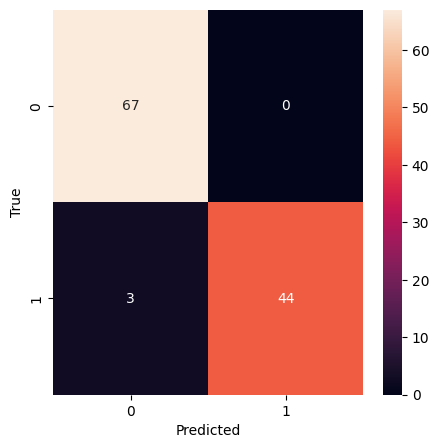

In [62]:
#  get confusion matrix as heatmap

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [61]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.96      1.00      0.98        67
           M       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Check model is correct as un supervised learning

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmc=KMeans(n_clusters=2)
kmc.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [41]:
kmc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
y

There are some difference with y and cluster lables

In [ ]:
kmc.labels_.sum()

In [ ]:
data['diagnosis'].value_counts()

But there is some relationship in between B and 1 in above unsupervised model